In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#distance calculator libraries
import haversine as hs
from haversine import Unit

from sklearn.cluster import KMeans

In [19]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv(r'D:\nyc-taxi-model\data\raw\NYC.csv')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
#checking null values in data 
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
pip install seaborn


   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 445.2 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 469.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 656.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 481.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 473.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 473.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.6 kB 473.7 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.6 kB 316.5 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 350.1 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.6 kB

<Axes: ylabel='pickup_longitude'>

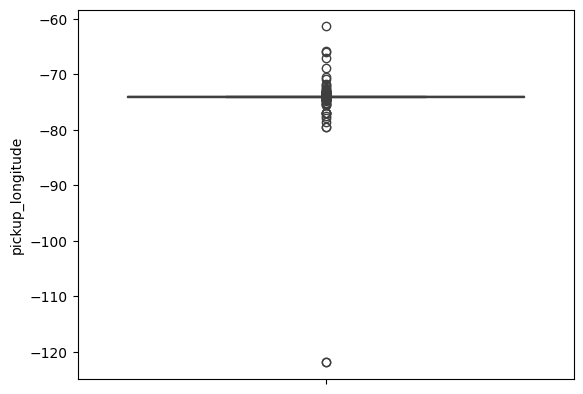

In [7]:
import seaborn as sns
sns.boxplot(df['pickup_longitude'])

<Axes: xlabel='trip_duration'>

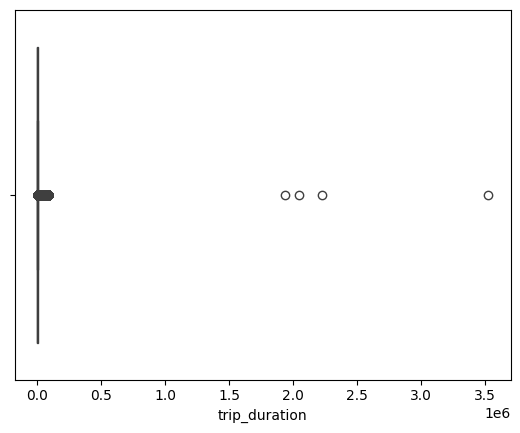

In [8]:
sns.boxplot(df, x = 'trip_duration')

In [10]:
df[df.trip_duration>30000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197
...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,N,72504
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314


In [11]:
df[df.trip_duration<30000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


<Axes: xlabel='trip_duration'>

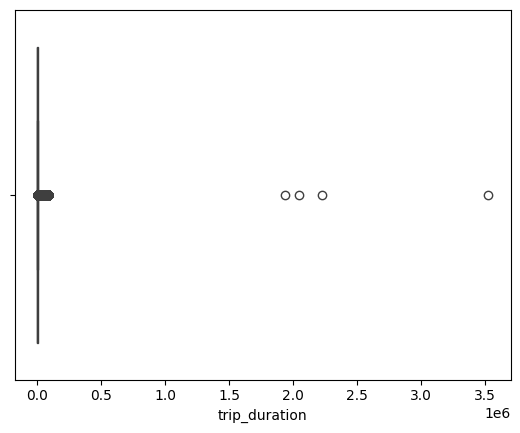

In [12]:
#box plot to understand the trip duration distribution 
sns.boxplot(df, x = 'trip_duration')

In [13]:
#removing trips with duration less than a minute as it doesn't makes much sense to have a minute trip only
df = df[df.trip_duration > 60]

In [15]:
#converting pick up date and drop off date into datetime object 
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [16]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [17]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['pickup_day']=df['pickup_datetime'].dt.day
df['pickup_weekday']=df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['trip_duration_mins'] = (df['trip_duration']/60).round(2)
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
df['pickup_weekday'] = df['pickup_weekday'].map(lambda x:weekday[x])


<Axes: xlabel='pickup_weekday', ylabel='count'>

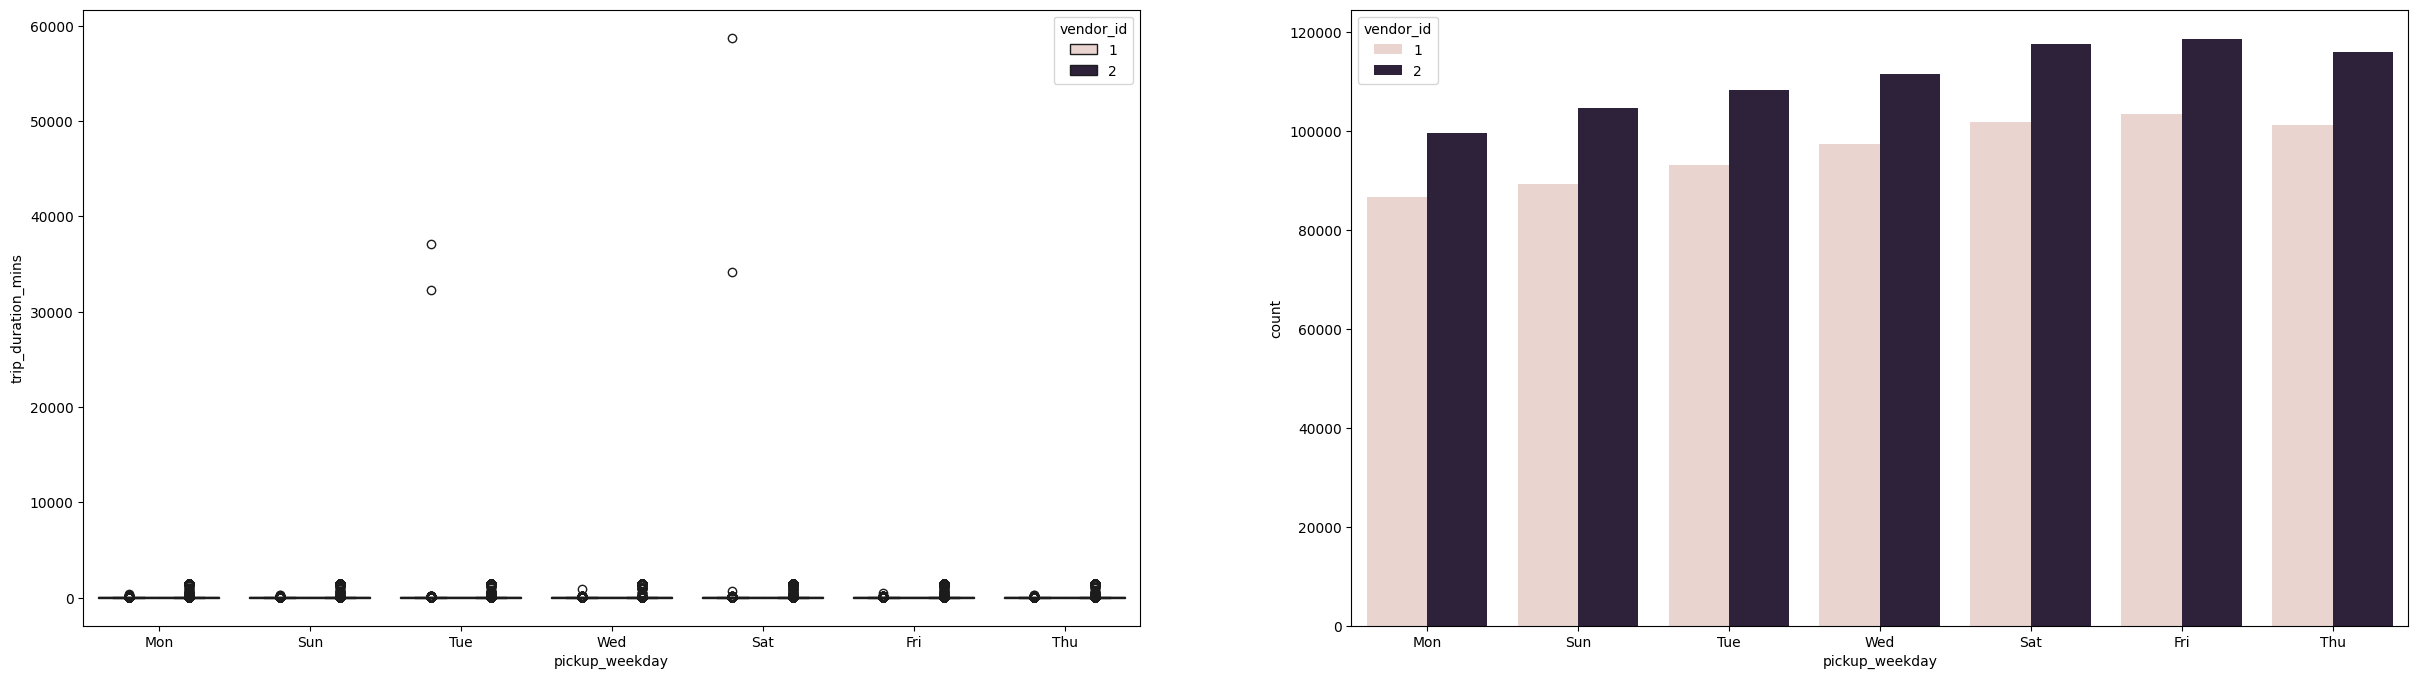

In [21]:
#plot to get the count of rides on each weekday by each vendor and their trip duration
fig, axs = plt.subplots(1,2, figsize=(30,8))
sns.boxplot(df, x = 'pickup_weekday',  y = 'trip_duration_mins',hue = 'vendor_id', ax=axs[0])
sns.countplot(df, x = 'pickup_weekday', hue = 'vendor_id',ax = axs[1])

<Axes: xlabel='pickup_weekday', ylabel='count'>

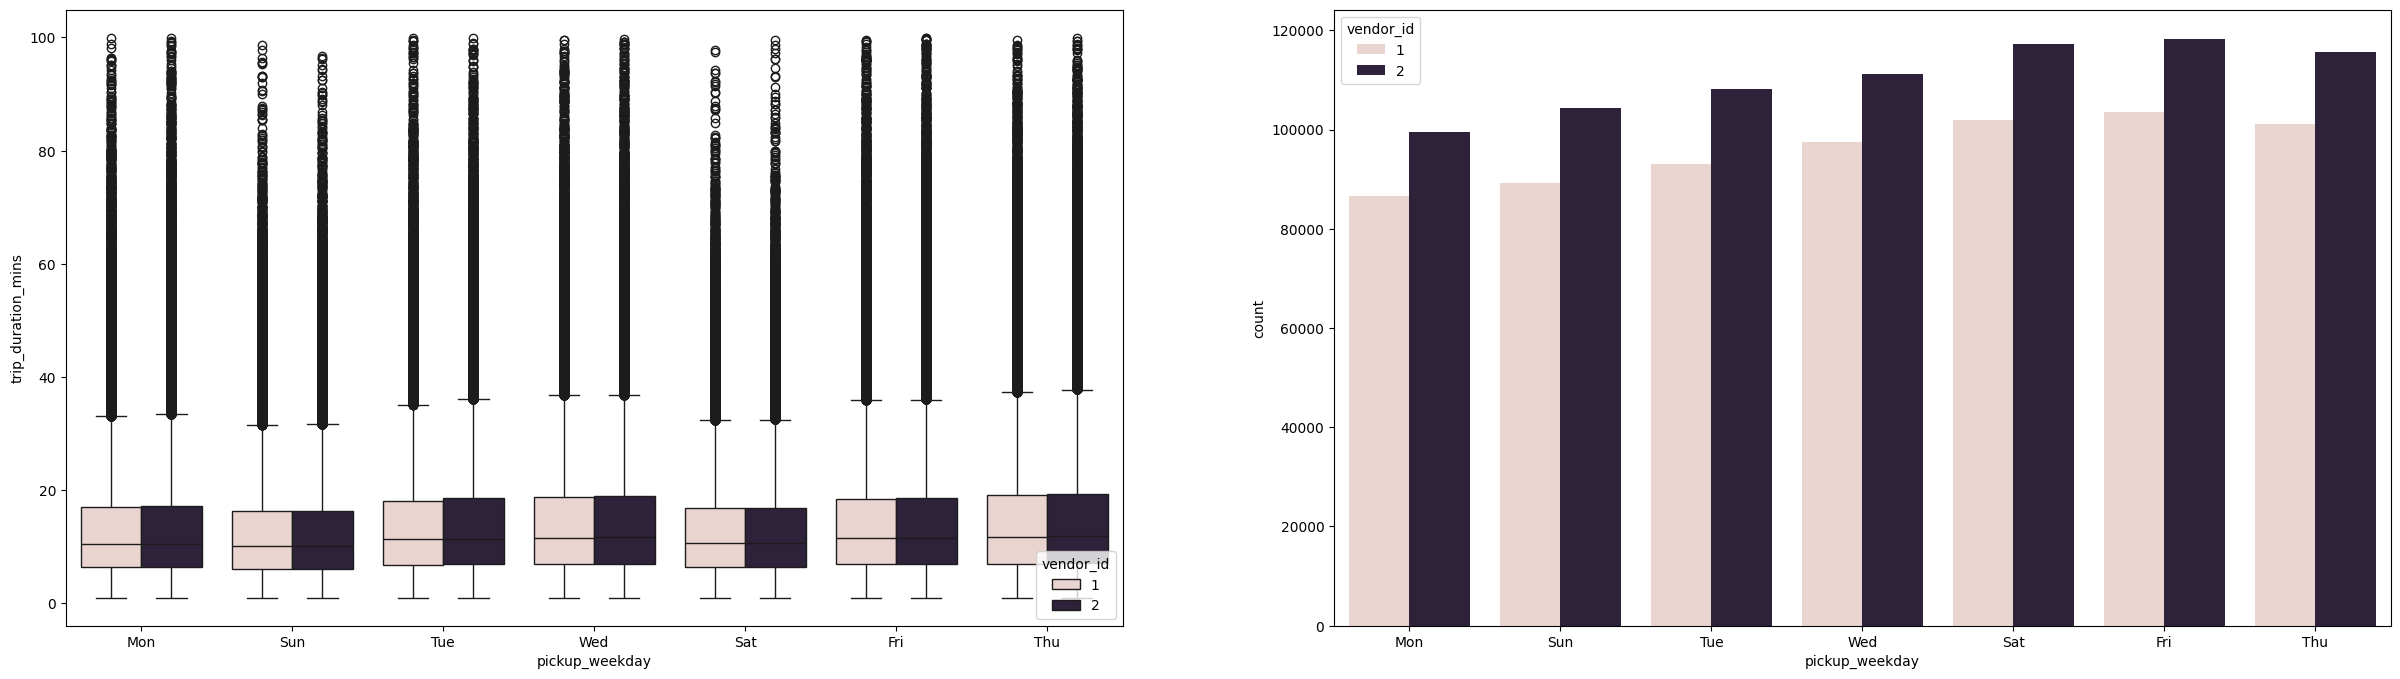

In [22]:
#removing all the trip duration with more than 100 minutes to get a better picture of effect of weekdays
fig, axs = plt.subplots(1,2, figsize=(30,8))
sns.boxplot(df[df.trip_duration_mins<=100], x = 'pickup_weekday',  y = 'trip_duration_mins',hue = 'vendor_id', ax=axs[0])
sns.countplot(df[df.trip_duration_mins<=100], x = 'pickup_weekday',  hue = 'vendor_id',ax = axs[1])

<Axes: xlabel='pickup_weekday'>

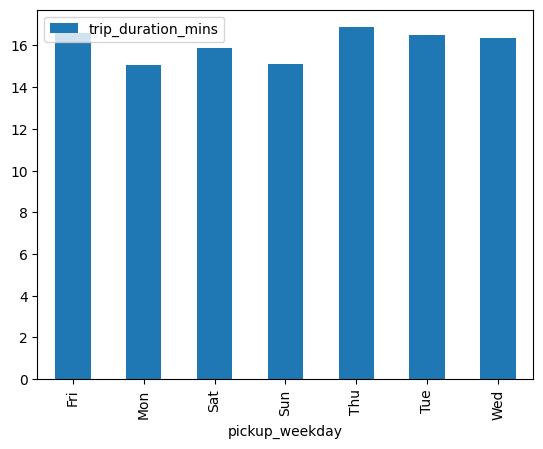

In [23]:
#average trip duration on each weekday
df.groupby('pickup_weekday').agg({'trip_duration_mins':'mean'}).plot(kind='bar')

<Axes: xlabel='pickup_hour', ylabel='count'>

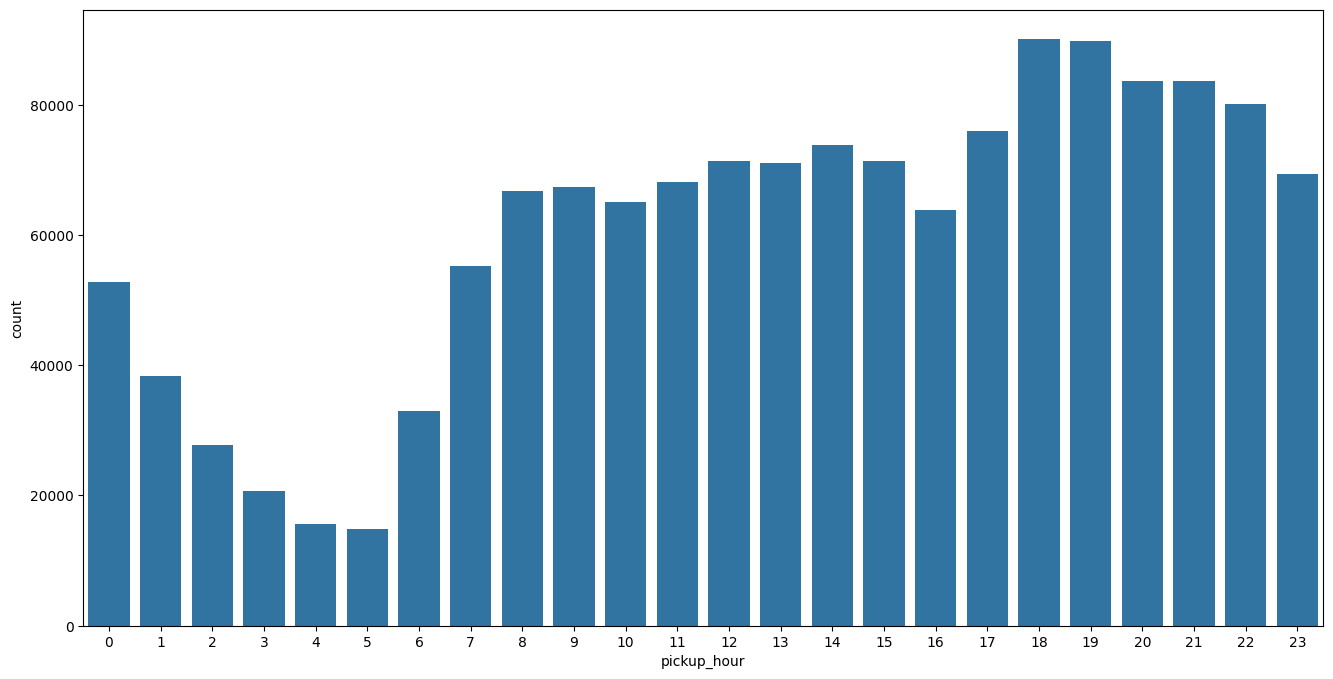

In [24]:
#plot to get the count of rides for each hour of the day 
fig = plt.figure(figsize=(16,8))
sns.countplot(df , x = 'pickup_hour')